# Linear Regression

Linear regression is a statistical method used to analyze the relationship between two variables, where one variable is considered as the independent variable and the other variable is considered as the dependent variable. The objective of linear regression is to find the best-fit line that can accurately predict the dependent variable given the independent variable.
The formula for linear regression is $y$ = $\beta_0$ + $\beta_1$ $x$, where $y$ is the dependent variable, $x$ is the independent variable,  $\beta_0$ is the intercept, and $\beta_1$ is the coefficient of $x$. The intercept represents the value of $y$ when $x$ is equal to zero, and the coefficient represents the change in $y$ for each unit increase in $x$.

Linear regression can be used for various purposes, such as predicting sales, analyzing trends, and identifying relationships between variables. It is a powerful tool that can help in making informed decisions and predictions based on data analysis.

To find the best-fit line, the linear regression algorithm calculates the sum of the squared differences between the predicted values and the actual values. The line with the smallest sum of squared differences is considered the best-fit line.

MSE cost function for a linear regression model :

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{1}$$ 

where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

## Gradient Descent


Gradient descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function. Gradient descent measures the local gradient of the error function with regard to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

In practice, you start by filling θ with random values (this is called random initialization) Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.


![image.png](lr_images/gradient_descent.PNG)


An important parameter in gradient descent is the size of the steps, determined by the `learning rate` hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time. On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.

There are 3 types of Gradient Descent:

- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent

1. **Batch Gradient Descent:** In this type of gradient descent, the entire dataset is used to compute the gradient of the cost function. The gradient is computed with respect to all the parameters of the model. Then, the parameters are updated using the average of the gradients. This process is repeated for a fixed number of iterations or until the cost function converges. Batch gradient descent is simple and easy to implement but can be computationally expensive, especially when the dataset is large.

2. **Stochastic Gradient Descent:** In this type of gradient descent, only one training example is used to compute the gradient at each iteration. The gradient is computed with respect to all the parameters of the model. Then, the parameters are updated using the computed gradient. This process is repeated for a fixed number of iterations or until the cost function converges. Stochastic gradient descent is faster than batch gradient descent as it updates the parameters more frequently. However, it can be noisy, and the convergence can be slower.

3. **Mini-Batch Gradient Descent:** In this type of gradient descent, a mini-batch of training examples is used to compute the gradient at each iteration. The gradient is computed with respect to all the parameters of the model. Then, the parameters are updated using the average of the gradients. This process is repeated for a fixed number of iterations or until the cost function converges. Mini-batch gradient descent is a compromise between batch and stochastic gradient descent. It is computationally efficient and provides a smoother convergence compared to stochastic gradient descent.

## Implementing Linear Regression from Scratch

We will implement Linear Regression model using gradient descent from scratch. *Gradient Descent* was described as

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, parameters $w$, $b$ are updated simultaneously.

The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [71]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [72]:
class LinearRegression():

    """
        Linear Regression model with mean squared error as cost function

        Parameters
        ----------

        learning_rate : float
                        learning rate of gradient descent algorithm
        n_iter : int
                number of iterations or epoch of gradient descent algorithm
        Attributes
        ----------
        lr : float
            learning rate of gradient descent algorithm
        n_iter : int
                number of iterations or epoch of gradient descent algorithm
        weights : numpy.array
                weights of our model are initialized with random numbers in [0,1]  
        bias : float
            bias of our model which is initialized with 0


        Methods
        -------
        fit(X,y)
            training the weights with regards to dataset (X and y)
        predict(X)
                predict target values corresponding to X
        _compute_gradient(X,y_true,y_predicted)
                        computing gradients of mse cost function

    """

    def __init__(self,learning_rate = 0.01,n_iter=2000):
        self.lr = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
    # computing gradients of mse cost function
    def _compute_gradient(self,X,y_true,y_predicted):
        n = X.shape[0]
        dw = (1/n) * np.dot(X.T,(y_predicted-y_true))
        db = (1/n) * np.sum(y_predicted-y_true)
        return dw , db

    def predict(self,X):
        return np.dot(X,self.weights) + self.bias

    def fit(self,X,y):
        # initializing weights and bias
        self.weights = np.random.rand(X.shape[1])
        
        
        self.bias = 0 

        for _ in range(self.n_iter):

            y_predicted = self.predict(X)

            dw , db = self._compute_gradient(X,y,y_predicted)
            
            # updating weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

We will preform our implemented linear regression model on a simple dataset.

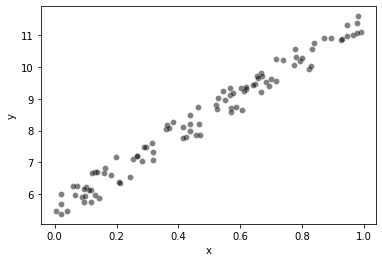

In [77]:
# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 6 * x + np.random.rand(100, 1)

# plot
sns.scatterplot(x=x.squeeze(), y=y.squeeze(), color="black", alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [78]:
lr_model = LinearRegression(n_iter=10000)

y = y.squeeze()

lr_model.fit(x,y)

Plotting fitted line

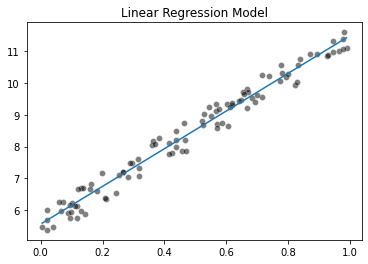

In [80]:
x_range = np.linspace(x.min(), x.max(), num=300)
predicted_y = (lr_model.weights[0] * x_range + lr_model.bias)
sns.scatterplot(x=x.squeeze(), y=y.squeeze(), color="black", alpha=0.5)

plt.plot(x_range, predicted_y)
_ = plt.title("Linear Regression Model")

## Linear Regression Using Scikit-Learn

In [81]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(x, y)

LinearRegression()

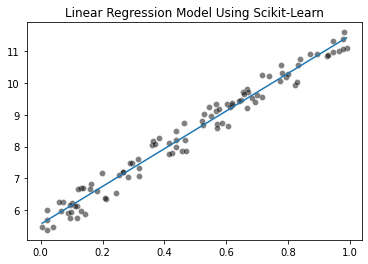

In [83]:
x_range = np.linspace(x.min(), x.max(), num=300)
predicted_y = (linear_regression.coef_[0] * x_range + linear_regression.intercept_)
sns.scatterplot(x=x.squeeze(), y=y.squeeze(), color="black", alpha=0.5)

plt.plot(x_range, predicted_y)
_ = plt.title("Linear Regression Model Using Scikit-Learn")

We can also compute the mean squared error:

In [84]:
from sklearn.metrics import mean_squared_error

y_predicted = linear_regression.predict(x)
model_error = mean_squared_error(y, y_predicted)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 0.08


A linear regression model minimizes the mean squared error on the training set. This means that the parameters obtained after the fit (i.e. coef_ and intercept_) are the optimal parameters that minimizes the mean squared error. In other words, any other choice of parameters will yield a model with a higher mean squared error on the training set.

## Polynomial Regression

Linear regression provides a means of building models of the form:

$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{6}$$ 

What if your features/data are non-linear or are combinations of features? For example, Housing prices do not tend to be linear with living area but penalize very small or very large houses resulting in the curves shown in the graphic above. How can we use the machinery of linear regression to fit this curve? Recall, the 'machinery' we have is the ability to modify the parameters  𝐰,𝐛 in (1) to 'fit' the equation to the training data. However, no amount of adjusting of  𝐰, 𝐛 in (1) will achieve a fit to a non-linear curve.

A machine learning pipeline that combines a non-linear feature engineering step followed by a linear regression step can therefore be considered non-linear regression model as a whole.

To illustrate these concepts, we will create a simple dataset

In [90]:
rng = np.random.RandomState(0)

n_sample = 100
x_max, x_min = 1.4, -1.4
len_data = (x_max - x_min)
# sort the data to make plotting easier later
x = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
noise = rng.randn(n_sample) * .3
y = x ** 3 - 0.5 * x ** 2 + noise

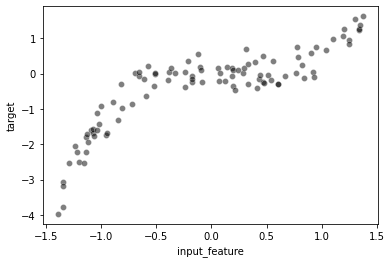

In [91]:
full_data = pd.DataFrame({"input_feature": x, "target": y})

_ = sns.scatterplot(data=full_data, x="input_feature", y="target",
                    color="black", alpha=0.5)

We will highlight the limitations of fitting a linear regression model as done in the previous exercise.

In [96]:
x = x.reshape((-1, 1))
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(x, y)
y_predicted = linear_regression.predict(x)

In [97]:
mse = mean_squared_error(y, y_predicted)

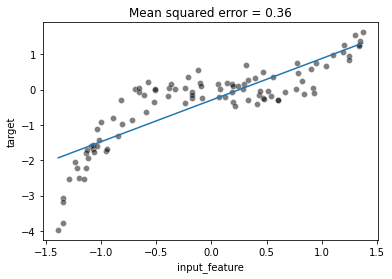

In [98]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(x, y_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

To solve this issue we could modify our data: we could create new features, derived from the original features, using some expert knowledge. In this example, we know that we have a cubic and squared relationship between x and y (because we generated the data).

In [99]:
x_expanded = np.concatenate([x, x ** 2, x ** 3], axis=1)
x_expanded.shape

(100, 3)

In [101]:
linear_regression.fit(x_expanded, y)
y_predicted = linear_regression.predict(x_expanded)
mse = mean_squared_error(y, y_predicted)

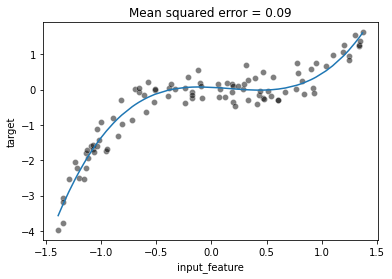

In [102]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(x, y_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

We can see that even with a linear model, we can overcome the linearity limitation of the model by adding the non-linear components in the design of additional features. Here, we created new features by knowing the way the target was generated.

Instead of manually creating such polynomial features one could directly use 

sklearn.preprocessing.PolynomialFeatures.


To demonstrate the use of the ``PolynomialFeatures`` class, we use a scikit-learn pipeline which first transforms the features and then fit the regression model.

In [105]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=3,include_bias=False),
    LinearRegression(),
)
polynomial_regression.fit(x, y)
y_predicted = polynomial_regression.predict(x)
mse = mean_squared_error(y, y_predicted)

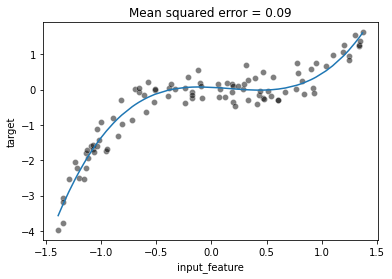

In [106]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(x, y_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

## 

## References
- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition
- Machine learning in Python with scikit-learn
- Machine Learning Specialization, Coursera